In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Cars.csv")
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [105]:
x =df.speed
y = df.dist

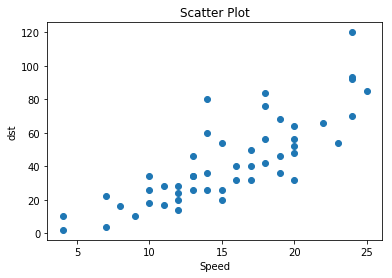

In [4]:
plt.scatter(df.speed, df.dist)
plt.xlabel("Speed")
plt.ylabel("dst")
plt.title("Scatter Plot")
plt.show()

In [112]:
def SSE(error): #Sum of Squares of Errors
    return np.sum([e*e for e in y_pred])

def SST(Y): #Total Sum of Squares
    ybar = np.sum(Y)
    return np.sum([(y-np.mean(y))**2 for y in Y])
def fstat(SSE, SST):
    SSR = SST - SSE
    return (SSR/SSE)
def RSquared(SSE, SST): #R^2 - Coefficient of Determination
    return (1-(SSE/SST))

def RSquaredAdj(r2, n, p): #Adjusted R-Square
    return (1 - (1 - r2) * ((n - 1)/(n-p-1)))

def MSE(Y, ypred): #Mean Square Error
    return np.mean((Y - ypred)**2)

def RMSE(error): #Root Mean Square Error
    return np.sqrt(np.mean([e*e for e in y_pred]))

def RSE(error): #Residual Standard error
    return np.sqrt((np.sum([e*e for e in y_pred]))/(len(y_pred)-2))

SSE = SSE(y_pred)
SST = SST(y)
R2 = RSquared(SSE, SST)
AdjR2 = RSquaredAdj(R2, len(y), 1) #No of predictors in this case = 1
MSE = MSE(y, y_pred)
RMSE = RMSE(y_pred)
RSE = RSE(y_pred)
Fstat = fstat(SSE, SST)

C:\Users\soura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


# Calculate the coefficients β0 and β1 

In [54]:
def estimate_coef(x, y): 

    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    print('Values of B0 and B1 :')
  
    return(b_0, b_1)

print(estimate_coef(x,y))

Values of B0 and B1 :
Values of B0 and B1 :
(-17.579094890510966, 3.9324087591240886)


# Calculate the Standard Errors associated with β0 and β1 

In [15]:
def std_error(x,y):
    n = np.size(x) 

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 

    # calculating cross-deviation and deviation about x 
    S_xy = np.sum(y*x) - ((np.sum(x)*np.sum(y))/n) 
    S_xx = np.sum(x*x) - (((np.sum(x))**2)/n) 

    # calculating regression coefficients 
    b_1_cap = S_xy / S_xx 
    b_0_cap = m_y - b_1_cap*m_x 

    yi_cap = b_0_cap + b_1_cap*x
    sigma2 = (np.sum((y-yi_cap)**2))/(n-2)
    std_b1_cap = np.sqrt(sigma2/S_xx)
    std_b0_cap = np.sqrt(sigma2*(1/n + (m_x**2/S_xx)))
    print('Standard Errors associated with B0 and B1 are :')
    return(std_b1_cap,std_b0_cap)

std_error(x,y)

Standard Errors associated with B0 and B1 are :


(0.4155127766571223, 6.758440169379235)

# Calculate the t-values and p-value associated with β0 and β1 

In [37]:
def slope_t_values(b_1_cap,std_b1_cap):
    t0 = b_1_cap/std_b1_cap
    print('T value for slope :')
    return t0


def intcpt_t_values(b_0_cap,std_b0_cap):
    t0 = b_0_cap/std_b0_cap
    print('T value for Intercept :')
    return T0
def pvalue(t0):
    import scipy.stats as ss
    print('Pvalue :')
    return ss.t.cdf(t0,2)

print(slope_t_values(b_1_cap,std_b1_cap))
print(pvalue(t0))

T value for slope :
9.463989990298373
Pvalue :
0.9945093769231558


# Model the regression line:  𝒅𝒊𝒔𝒕 ̂ =  β0 + β1 * speed 

In [73]:
def ypred(x,b_0,b_1):
    ypred =[]
    for i in range(len(x)):
        ypred.append(b_0+b_1*x[i])
    return(ypred)
y_pred = ypred(x,b_0,b_1)

In [55]:
def RSE(error): #Residual Standard error
    return np.sqrt((np.sum([e*e for e in error]))/(len(error)-2))

-17.579094890510966


# Create a plot of predicted dist v/s actual dist and explain your observations.

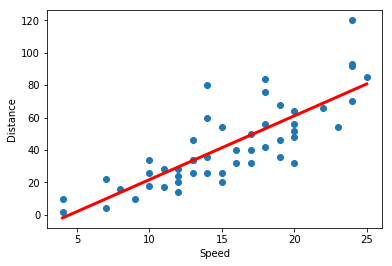

In [110]:
plt.scatter(x, y)
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.plot(np.array(x), y_pred, color='red', linewidth=3)
plt.show()

# Create a scatter plot of the residuals and explain your observations.

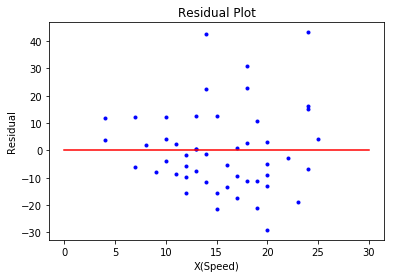

In [83]:
#Residual Plot
residual = y - y_pred
plt.plot(x, residual,  'b.')
plt.plot([0, 30],[0,0],'r')
plt.xlabel("X(Speed)")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()


There is no pattern in the above residual plot but it has uneven spread (variance) because of outliers.

# Are the residuals normally distributed? Evaluate by creating and understanding the QuantileQuantile plot

0.9426251795863478

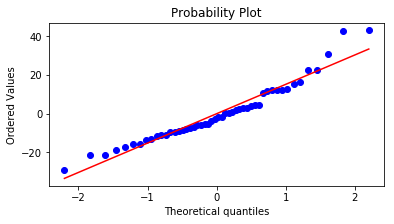

In [84]:
# Q-Q Plot to check the normality of residuals

residual = y - y_pred
import scipy as sp
fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(residual.ravel(), plot=ax, fit=True)
r**2

In [86]:
data = pd.DataFrame({'Coefficients': ['Intercept (β0)', 'X1 (β1)'], 'Estimates': [b_0, b_1], 'Std. Error': [std_b0_cap, std_b0_cap], 't-value': [t0, T0], 'p-value': [pvalue(t0), pvalue(T0)], 'Comments': ['Since p-value is grreater than 0.05 we can accept the Null Hypothesis', 'Since p-value is grreater than 0.05 we can accept the Null Hypothesis']})
data.set_index('Coefficients', inplace=True)
display(data)

Pvalue :
Pvalue :


,Estimates,Std. Error,t-value,p-value,Comments
Coefficients,,,,,
Intercept (β0),-17.579095,6.75844,9.463990,0.994509,Since p-value is grreater than 0.05 we can acc...
X1 (β1),3.932409,6.75844,-2.601058,0.060730,Since p-value is grreater than 0.05 we can acc...


In [113]:
data2 = pd.DataFrame({0: ["Residual Standard Error", "Multiple R-Squared", "F Statistic"], 1: [RSE, R2, Fstat], 2: ["Degree of Freedom", "Adjusted R-sqaured", ""], 3: [1, AdjR2, ""]})
display(data2)

,0,1,2,3
0,Residual Standard Error,48.63758,Degree of Freedom,1
1,Multiple R-Squared,-inf,Adjusted R-sqaured,-inf
2,F Statistic,-1.00000,,


## we hereby agree that this assignment is done in group and is original.
## group members: Sourav Gajbhiye and Shinakshi Sankhayan